# Objectives
* To parse an XML file into a dictionary
* To prepare ETLs for XML data

# Why are we doing this?
This is part of flatting the hierarchy of data because data in a table is usually flat for a relational database.

# Methodology
* Parsing the XML data into dictionaries using xmltodict
* Converting the dictionary back into a JSON object

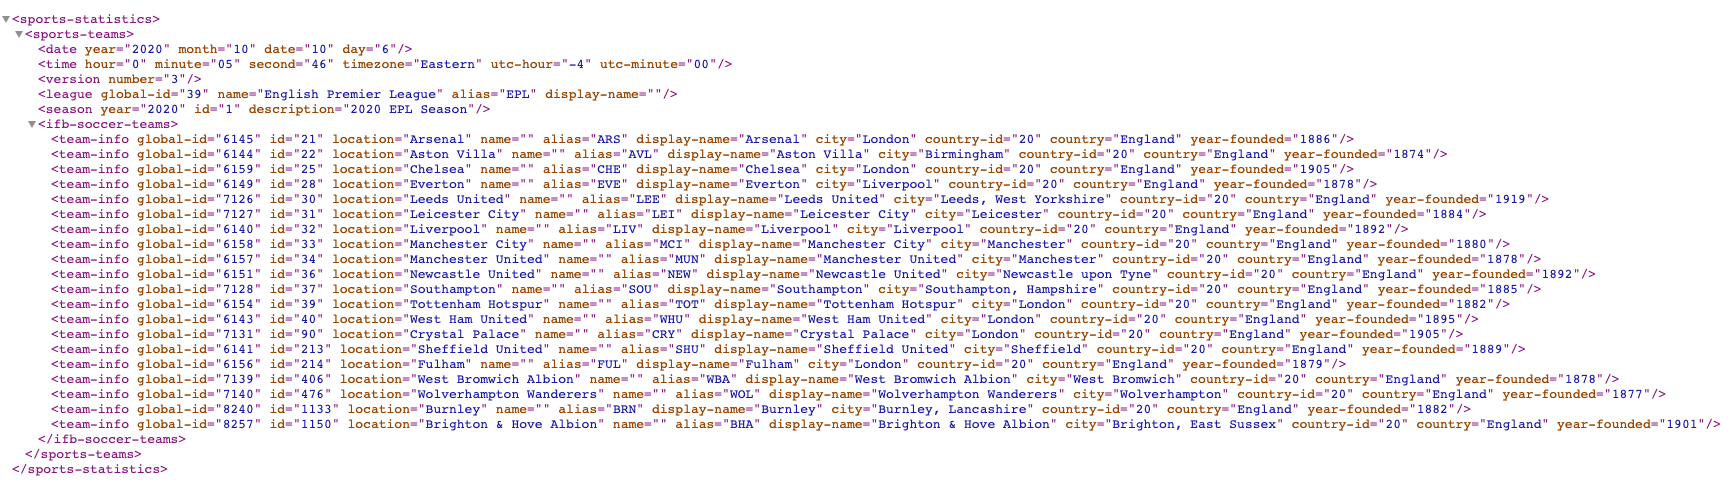

In [ ]:
# First, let's observe the data
from IPython.display import Image
Image(filename='images/example_xml.png')

### What do we observe here?

Each node contains many data variables for us to harvest. The goal is to extract each and every data variable for [Extract-Transform-Load (ETL)](https://gefyra.co/batch-etl-with-python-mysql-and-cron/).

The question becomes:
* How should I convert the above into data variables which I can manipulate?

There are many ways to manipulate XML with Python, but I'm going to use one of the ways that make it easy.

Caveats:
* I'm not concerned about efficiency and optimization here. I just want to be able to manipulate the data to do my exploratory data analysis (EDA).
* If you want speed, there are other libraries, such as `lxml`.

In [ ]:
# Need to install xmltodict
import xmltodict, json

In [ ]:
# Source file is in the data folder
with open('data/example.xml') as f:
    xml_data = f.read()

# Output the data to check
xml_data

'<?xml version="1.0" encoding="UTF-8"?>\n<sports-statistics>\n  <sports-teams>\n    <date year="2020" month="10" date="10" day="6"/>\n    <time hour="0" minute="05" second="46" timezone="Eastern" utc-hour="-4" utc-minute="00"/>\n    <version number="3"/>\n    <league global-id="39" name="English Premier League" alias="EPL" display-name=""/>\n    <season year="2020" id="1" description="2020 EPL Season"/>\n    <ifb-soccer-teams>\n        <team-info global-id="6145" id="21" location="Arsenal" name="" alias="ARS" display-name="Arsenal" city="London" country-id="20" country="England" year-founded="1886"/>\n        <team-info global-id="6144" id="22" location="Aston Villa" name="" alias="AVL" display-name="Aston Villa" city="Birmingham" country-id="20" country="England" year-founded="1874"/>\n        <team-info global-id="6159" id="25" location="Chelsea" name="" alias="CHE" display-name="Chelsea" city="London" country-id="20" country="England" year-founded="1905"/>\n        <team-info global

In [ ]:
data = xmltodict.parse(xml_data)
data

OrderedDict([('sports-statistics',
              OrderedDict([('sports-teams',
                            OrderedDict([('date',
                                          OrderedDict([('@year', '2020'),
                                                       ('@month', '10'),
                                                       ('@date', '10'),
                                                       ('@day', '6')])),
                                         ('time',
                                          OrderedDict([('@hour', '0'),
                                                       ('@minute', '05'),
                                                       ('@second', '46'),
                                                       ('@timezone',
                                                        'Eastern'),
                                                       ('@utc-hour', '-4'),
                                                       ('@utc-minute',
                          

In [ ]:
# Use the JSON library to make the dictionary cleaner
json_data = json.loads(json.dumps(xmltodict.parse(xml_data)))
json_data

{'sports-statistics': {'sports-teams': {'date': {'@year': '2020',
    '@month': '10',
    '@date': '10',
    '@day': '6'},
   'time': {'@hour': '0',
    '@minute': '05',
    '@second': '46',
    '@timezone': 'Eastern',
    '@utc-hour': '-4',
    '@utc-minute': '00'},
   'version': {'@number': '3'},
   'league': {'@global-id': '39',
    '@name': 'English Premier League',
    '@alias': 'EPL',
    '@display-name': ''},
   'season': {'@year': '2020', '@id': '1', '@description': '2020 EPL Season'},
   'ifb-soccer-teams': {'team-info': [{'@global-id': '6145',
      '@id': '21',
      '@location': 'Arsenal',
      '@name': '',
      '@alias': 'ARS',
      '@display-name': 'Arsenal',
      '@city': 'London',
      '@country-id': '20',
      '@country': 'England',
      '@year-founded': '1886'},
     {'@global-id': '6144',
      '@id': '22',
      '@location': 'Aston Villa',
      '@name': '',
      '@alias': 'AVL',
      '@display-name': 'Aston Villa',
      '@city': 'Birmingham',
      '@coun

As you can see, JSON data is much cleaner to look at.

In [ ]:
# Example: Traversing team-info
for team in json_data['sports-statistics']['sports-teams']['ifb-soccer-teams']['team-info']:
    print(team['@alias'])

ARS
AVL
CHE
EVE
LEE
LEI
LIV
MCI
MUN
NEW
SOU
TOT
WHU
CRY
SHU
FUL
WBA
WOL
BRN
BHA
